<a href="https://colab.research.google.com/github/deloragaskins/data_science_public/blob/create_tutorials/constructing_intro_of_VisualisingMaskingfortokenprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Masking using SMILES representation Like natural language sentences can be broken down into tokens and used for masked language modeling, SMILES strings can also be tokenized and masked as shown in the example of acetone below.

Example: SMILES Representation: CC(=O)C

Masked SMILES Representation: CC([MASK]O)C

In [1]:


#to play with and display chemical structures
!pip install rdkit-pypi
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import Draw as ChemDraw
from rdkit.Chem.Draw import MolToImage

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import colors

In [4]:
import rdkit.Chem.rdFMCS as rdFMCS

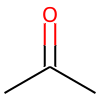

In [5]:
acetone_smiles='CC(=O)C'
molecule_smiles=acetone_smiles
mol=Chem.MolFromSmiles(molecule_smiles)
filename='acetone.png'
ChemDraw.MolToFile(mol,filename, size=(100, 100))
MolToImage(mol,size=(100,100))


In [6]:
def addmask(molecule_str,mask_str,mask_start_pos,mask_end_pos):
  masked=''
  for counter0 in range(len(molecule_str)):
    if mask_len>0:
      if counter0 in range(mask_start_pos,mask_end_pos):
        masked+=''
      elif counter0 == mask_end_pos:
        masked+=mask_str
      else:
        masked+=molecule_str[counter0]
    else:
        masked+=molecule_str[counter0]
  #print(masked)
  return masked

molecule_str=acetone_smiles

mask_start_pos=3
mask_end_pos=mask_start_pos
mask_len=mask_end_pos-mask_start_pos+1
mask_str='[mask]'

substructure_smarts=molecule_str[mask_start_pos:mask_start_pos+mask_len]
print(substructure_smarts)

masked_moleculestring=addmask(molecule_str,mask_str,mask_start_pos,mask_end_pos)
print(masked_moleculestring)

=
CC([mask]O)C


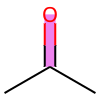

In [7]:

Cell_label='Visualize potential mask sites on molecule'
Bonds_list=[1]
#highlight
hcolor = colors.to_rgb('violet')
filename='acetone_mask.png'
ChemDraw.MolToFile(mol,filename, size=(100, 100),fitImage=True,highlightBonds=Bonds_list,highlightColor=hcolor)
MolToImage(mol, size=(100, 100),fitImage=True,highlightBonds=Bonds_list,highlightColor=hcolor)



CC(-O)C
CC(NO)C
CC(CO)C


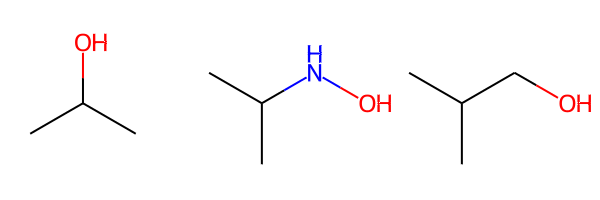

In [8]:
prediction1=masked_moleculestring.replace(mask_str,'-')
prediction2=masked_moleculestring.replace(mask_str,'N')
prediction3=masked_moleculestring.replace(mask_str,'C')
predictions=[prediction1, prediction2, prediction3]
for string in predictions:
  print(string)

predictions_mols = [Chem.MolFromSmiles(x) for x in predictions]
ChemDraw.MolsToGridImage(predictions_mols)



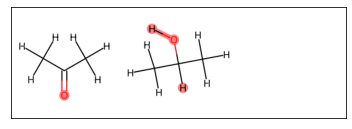

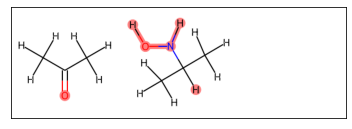

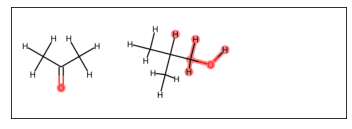

In [9]:
#https://www.rdkit.org/docs/Cookbook.html


def view_difference_Hs(mol1, mol2):
    mol1=Chem.AddHs(mol1)
    mol2=Chem.AddHs(mol2)
    mcs = rdFMCS.FindMCS([mol1,mol2])
    mcs_mol = Chem.MolFromSmarts(mcs.smartsString)
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return ChemDraw.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])


mol1=mol
for mol2 in predictions_mols:
  plt.figure()
  plt.imshow(view_difference_Hs(mol1,mol2))
  plt.xticks([])
  plt.yticks([])


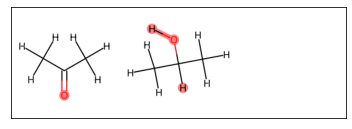

In [10]:
mol1=mol
mol2=predictions_mols[0]
plt.imshow(view_difference_Hs(mol1,mol2))
plt.xticks([])
plt.yticks([])
filename='compare_differences_in_in_prediction.png'
plt.savefig(filename)
